# Projekt Elektrostatik
Autoren: Albertin, Schegg

## Aufgabenstellung:
- Kamm-Aktor für Drehbewegungen
- 2 Quaderförmige Leiter $2$ mm $\cdot$ $1$ mm $\cdot$ $0.3$ mm
- Koordinaten des Drehpunktes $D = (-0.5,0.5)$
- Luftspalt Dicke $0.01$ mm


## Aufgabe 1:
**a):** Bestimmung der Überlappungsfläche der beiden Platten (in der Abbildung unten ersichtlich) abhängig vom Drehwinkel $\alpha \in [0°, 90°]$.

**b):** Bestimmung des Verthältnisses der Überlappungsfläche zur Fläche einer Platte in Prozent abhängig vom Drehwinkel $\alpha \in [0°, 90°]$.

<img src="./Bilder/Geometrie_Aufgabe.png" alt="Hallo" width="400" height="300">

### Aufgabe a):
- Für die Lösung mit Python wurde eine Rotationsmatrix verwendet, da eine Rotationsmatrix stets um den Ursprung rotiert muss ist es nötig die Eckpunkte relativ zum Drehpunkt zu bestimmen. Wenn die Rotation mit der Rotationsmatric durchgeführt wurde, kann die Drehachse wieder addiert werden. Daraus wurde ein Polygon erstelt bei dem die Intersektion mit der festen Platte bestimmt wurde.

In [1]:
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import pandas as pd

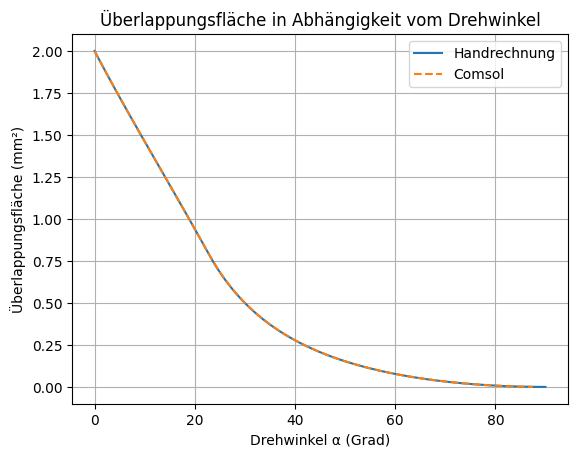

In [2]:
# Geometrie der festen Platte
feste_platte = Polygon([(0, 0), (2, 0), (2, 1), (0, 1)])


# Funktion zur Berechnung der Drehung
def rotiere_platte(alpha, drehachse=(-0.5, 0.5)):
    # Ecken der Platte relativ zur Drehachse
    ecken = np.array([[0.5, -0.5], [2.5, -0.5], [2.5, 0.5], [0.5, 0.5]])
    alpha_rad = np.radians(alpha)

    # Rotationsmatrix
    R = np.array(
        [
            [np.cos(alpha_rad), -np.sin(alpha_rad)],
            [np.sin(alpha_rad), np.cos(alpha_rad)],
        ]
    )

    # Drehung der Ecken
    ecken_rotiert = np.dot(ecken, R.T) + drehachse # R.T wegen der Form der ecken-Matrix
    return Polygon(ecken_rotiert)


# Winkelbereich definieren
winkel_alpha = np.linspace(0, 90,1000)
ueberlappungsflaechen = []

# Überlappungsflächen berechnen
for alpha in winkel_alpha:
    dreh_platte = rotiere_platte(alpha)
    schnitt = feste_platte.intersection(dreh_platte)
    ueberlappungsflaechen.append(schnitt.area)

Ac = pd.read_csv("./Daten/Flächenvergleich.csv")

# Ergebnisse plotten
plt.plot(winkel_alpha, ueberlappungsflaechen, label="Handrechnung")
plt.plot(Ac["alpha (deg)"], 10**6*Ac["1 (m^2)"], linestyle= "--",label= "Comsol")
plt.xlabel("Drehwinkel α (Grad)")
plt.ylabel("Überlappungsfläche (mm²)")
plt.title("Überlappungsfläche in Abhängigkeit vom Drehwinkel")
plt.grid()
plt.legend()

Die Handrechnung sowie die Rechnung mit Comsol ergeben das gleiche Resultat für die Überlappungsfläche.

Der Grundbaustein der Geometrie sieht aus wie in der Abbildung unten links. Er wurde aus zwei Rechtecken und einem Rotationselement erstellt. Für die Bestimmung der Überlagerungsfläche wurde noch ein intersektions Element hinzugefügt, dies kann in der Abbildung unten rechts für $\alpha = 30\text{°}$ betrachtet werden. Es wurden 36 Winkel zwischen 0° und 87.5° verwendet durch einen  _Parametric Sweep_ wurde die Überlagerungsfläche für jeden Winkel bestimmt und nachher mittels _Derived Values_ $\rarr$ _Surface Integration_ eine Tabelle der Werte erstellt die nacher exportiert werden konnte. (Es wurde nur die Aufgabe 1a mit Comsol zur Kontrolle gelöst, da die Aufgabe 1b nur eine Umformung ist muss sie nicht zusätzlich überprüft werden.)

<img src="./Bilder/Geometrie2.png" alt="Hallo" width="400" height="300"> <img src="./Bilder/Intersektion.png" alt="Alternativtext" width="400" height="300">


### Aufgabe b):
Durch einfache Umformung kann aus der Rechnung vorher bestimmt.

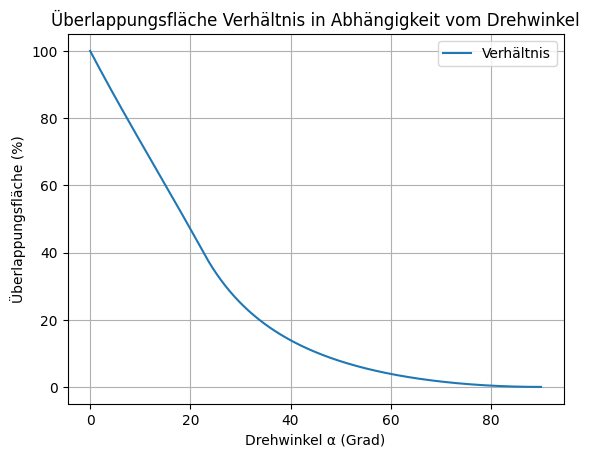

In [3]:
# Ergebnisse plotten aufgabe b)
A = 2  # Fläche in (mm²)

ueberlappungsflaechenb = [100 * element / A for element in ueberlappungsflaechen]
plt.plot(winkel_alpha, ueberlappungsflaechenb, label="Verhältnis")
plt.xlabel("Drehwinkel α (Grad)")
plt.ylabel("Überlappungsfläche (%)")
plt.title("Überlappungsfläche Verhältnis in Abhängigkeit vom Drehwinkel")
plt.grid()
plt.legend()

### Visualiserung der Rotation zur Kontrolle:

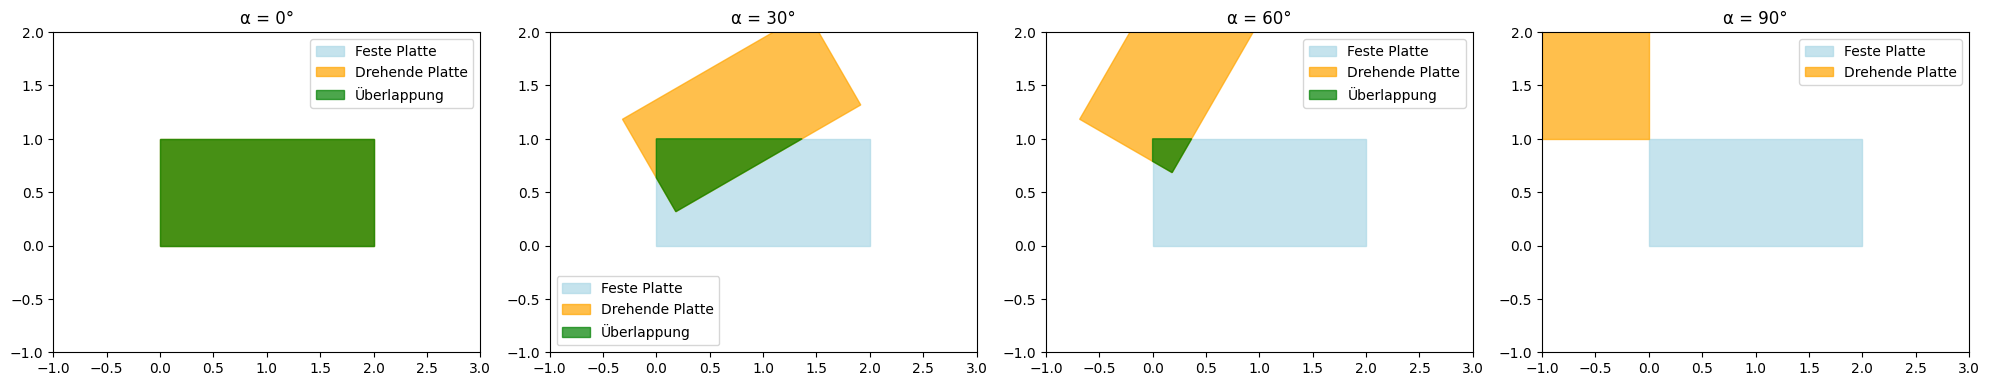

In [4]:
# Plot der Platten für ausgewählte Winkel
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
angles_to_plot = [0, 30, 60, 90]

for ax, angle in zip(axes, angles_to_plot):
    dreh_platte = rotiere_platte(angle)

    # Feste Platte plotten
    x, y = feste_platte.exterior.xy
    ax.fill(x, y, color="lightblue", alpha=0.7, label="Feste Platte")

    # Drehende Platte plotten
    x, y = dreh_platte.exterior.xy
    ax.fill(x, y, color="orange", alpha=0.7, label="Drehende Platte")

    # Überlappung plotten
    schnitt = feste_platte.intersection(dreh_platte)

    # exterior funktioniert nicht für Punkte
    if not schnitt.is_empty and angle != 90:
        x, y = schnitt.exterior.xy
        ax.fill(x, y, color="green", alpha=0.7, label="Überlappung")

    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 2)
    ax.set_aspect("equal")
    ax.set_title(f"α = {angle}°")
    ax.legend()

plt.tight_layout()

Die visualisierten Elemente erscheinen sinnvoll. Mit dieser Kontrolle zusammen mit der Kontrolle durch Comsol kann mit hoher Wahrscheinlichkeit gesagt werden, dass die Überlappungsfläche korrekt bestimmt wurde.

## Aufgabe 3): 

### Comsol der Aufgabe 3:

Die Geometrie die Simulation der Aufgabe 3 wurde wie folgt aufgebaut:
- Ein Würfel mit Seitenlänge $5$ mm der die Luft darstellt. ($\epsilon_r$ der Luft wurde bei der Simulation vernachlässigt, da es nahezu 1 ist.)
- Zwei Blöcke mit einer länge von $2$ mm einer Breite von $0.3$ mm und einer Höhe von $1$ mm.
- Zwischen diesen zwei Blöcke hat es einen Abstand von $0.01$ mm.

<img src="./Bilder/3DGeometrie.png" alt="Hallo" width="400" height="300">

Das Potenzial der bewegten Platte sowie die Energie des Rechengebiets wurden mittels Proben bestimmt. Das Drehmoment wurde durch _Force Calculation_ und nachher _Derived Values_ $\rarr$ _Global Evaluation_ bestimmt.

### Handrechnung der Aufgabe 3:

**Vereinfachungen:**
- 2D-Rechnung 
- Betrachtung wie ein Plattenkondensator.
- Luft hat den gleichen $\epsilon_r$ wie Vakuum.

Kapazität:
$$ C(\alpha) = \epsilon_0 \cdot \frac{A(\alpha)}{d} $$

In [5]:
eps0 = 8.854 * 10 ** (-12)  # elektr. Feldkonstante [F/m]
d = 10 ** (-5)  # Abstand [m]
Q = 1.856 * 10 ** (-11)  # Ladung in [C]

In [6]:
A = [
    element / 10**6 for element in ueberlappungsflaechen
]  # Fläche des Kondensator in [m^2]
A = np.array([A])

Text(0.5, 1.0, 'Kapazität zu Winkel')

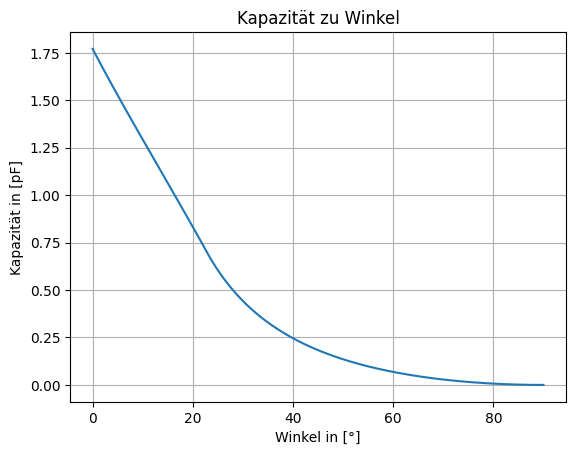

In [7]:
C = eps0 * A / d  # Kapazität in [F]
alpha = np.array([winkel_alpha])  # Winkel in [°]

plt.plot(alpha[0, :], 10**12 * C[0, :])
plt.grid()
plt.ylabel("Kapazität in [pF]")
plt.xlabel("Winkel in [°]")
plt.title("Kapazität zu Winkel")

$$ w_e = \frac{W}{A \cdot d}$$
Der Integral der Energiedichte is die Energie.
$$ W(\alpha) = \frac{Q^2}{2 \cdot C(\alpha)} $$

In [8]:
# Division durch null verhindern.
C = np.where(C == 0, 10 ** (-14), C)
A = np.where(A == 0, 10 ** (-14), A)

In [9]:
Wc = pd.read_csv("./Daten/Energie.csv") #Energie mit Comsol berechnet

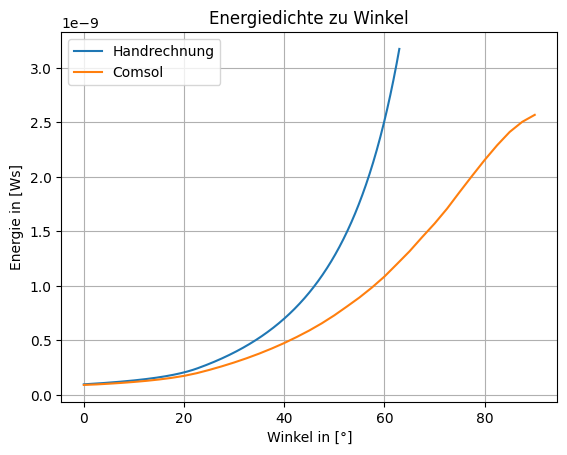

In [10]:
W = 1 / 2 * Q**2 / C  # Energie in [Ws]
we = W / (A * d)  # Energiedichte in [W/m^3]
plt.plot(alpha[0, :-300], W[0, :-300], label = "Handrechnung")
plt.plot(-Wc["alpha (deg)"],Wc["Total electric energy (J)"], label = "Comsol")
plt.grid()
plt.ylabel("Energie in [Ws]")
plt.xlabel("Winkel in [°]")
plt.title("Energiedichte zu Winkel")
plt.legend()

Potenzial:
$$ \phi(\alpha) = \frac{Q}{C(\alpha)} $$

In [11]:
Phic = pd.read_csv("./Daten/Potenzial.csv") # Potenzial mit Comsol berechnet

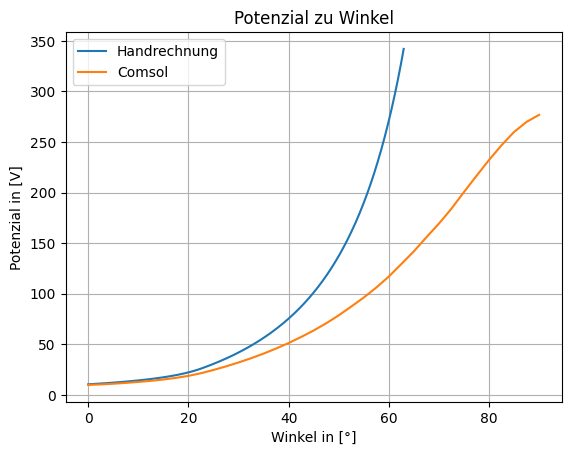

In [12]:
Phi = Q / C
plt.plot(alpha[0, :-300], Phi[0, :-300], label = "Handrechnung")
plt.plot(-Phic["alpha (deg)"], Phic["Electric potential (V), Potential bewegliche Platte"], label= "Comsol")
plt.grid()
plt.ylabel("Potenzial in [V]")
plt.xlabel("Winkel in [°]")
plt.title("Potenzial zu Winkel")
plt.legend()

Drehmoment:
$$ M(\alpha) = \frac{d W(\alpha)}{d \alpha} $$ 
$$ M \approx  \frac{\Delta W}{\Delta \alpha} $$

Kraft: 
$$F=\frac{1}{2d}\frac{Q^2}{C}$$

In [13]:
F = 1/(2*d)*(Q**2)/C
F1 = 1/(2*d**2)*A*Phi**2*eps0
r = np.array([1.5*10**(-3),0])
a = np.linalg.norm(r)
Mf = F*a
Mf1 = F1*a

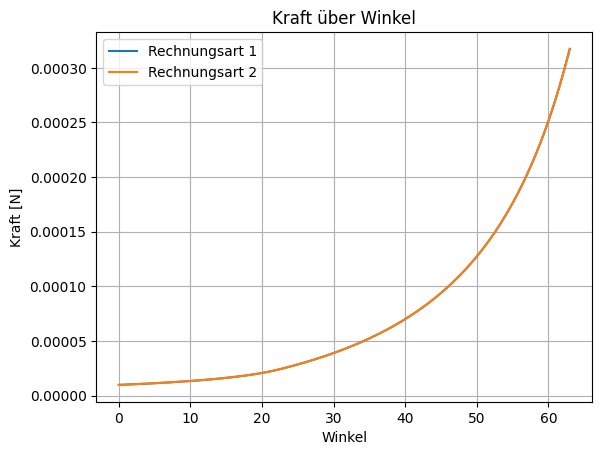

In [14]:
plt.plot(alpha[0,:-300], F[0,:-300], label="Rechnungsart 1")
plt.plot(alpha[0,:-300], F1[0,:-300], label="Rechnungsart 2")
plt.title("Kraft über Winkel")
plt.ylabel("Kraft [N]")
plt.xlabel("Winkel")
plt.grid()
plt.legend()

In [15]:
M = []
for i in range(W.shape[1] - 1):  # Spaltenanzahl minus 1
    delta_W = W[0, i + 1] - W[0, i]
    delta_alpha = alpha[0, i + 1] - alpha[0, i]
    M.append(delta_W / delta_alpha)

In [16]:
Mc = pd.read_csv("./Daten/Drehmoment_neu.csv") # Drehmoment mit Comsol berechnet

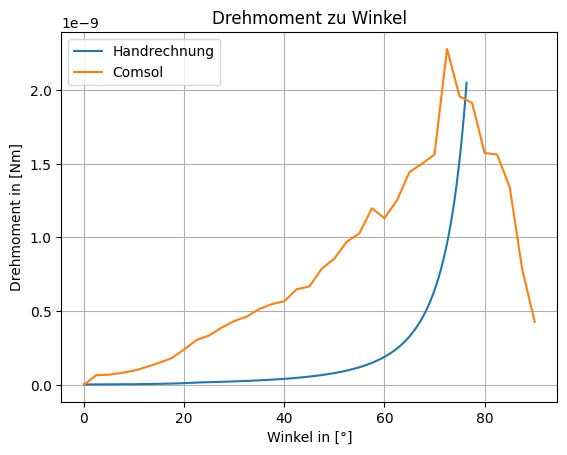

In [17]:
alphapop = alpha[0, :-1]
plt.plot(alphapop[:-150], M[:-150], label= "Handrechnung")
#plt.plot(alpha[0,:], Mf1[0,:], label= "Handrechnung 2")
plt.plot(-Mc["alpha (deg)"], Mc["Axial torque (N*m)"], label = "Comsol")
plt.grid()
plt.ylabel("Drehmoment in [Nm]")
plt.xlabel("Winkel in [°]")
plt.title("Drehmoment zu Winkel")
plt.legend()

Woher könnten diese Differenz kommen?
- Es könnte daran liegen, dass die Handrechnung für 2D durchgeführt wurde somit ist der Einfluss der Seiten der Platten vernachlässigt. 
- Wenn in der ersten Abbildungen unten die E-Felder eines Kamm-Aktors mit der E-Felder der Handrechnung (zweite Abbildung unten) verglichen werden, dann wird erkannt, dass wahrscheinlich nur die blauen und roten Feldlinien des Kamm-Aktors durch die Handrechnung bestimmt werden kann. Die braunen und grünen Feldlinien könnten für die Abweichung der beiden Linien verantwortlich sein.
- Die grössere Steigung der Rechnung im Vergleich zu der Simulation könnte darauf zurückgeführt werden, dass die Fläche schnell abnimmt und da die Fläche in dieser Rechnung die einzige Variable ist, nehmen die Energiewerte und Potenzialswert schnell zu. Die Simulation hat wahrscheinlich mehr Einflussfaktoren wodurch die Änderung des Winkels keinen so starken Einfluss hat.  

![Schema eines Comb-Drive-Mechanismus](./Bilder/CombDrive.png)

*Bildquelle: [Wikipedia - Comb drive](https://en.wikipedia.org/wiki/Comb_drive)*

![Elektrisches Feld im Kondensator](./Bilder/FeldlinienPlattenkondensator.png)

*Bildquelle: [Elektrisches Feld im Kondensator](https://www.professorglasmachers.de/fe_el_elektrisches-feld-im-kondensator/)*

**Fazit:**
Auch wenn die Handrechnung nicht exakt mit der Simulation übereinstimmt, könne aus ihr Schlüsse gezogen werden.
- Für die Energie und das Potenzial haben die Werte für kleine Winkel eine geringe Abweichung. 
- Es macht Sinn, dass desto stärker der Einfluss des braunen und grünen E-Felds, desto grösser die Abweichung der Rechnung von der Simulation. 

### Untersuchung des Einflusses der Dicke des Luftspalts zwischen den Platten:

Die Geometrie für diese Studie wurde die Geometrie bei einem Winkel von $30$° eingefrohren. Dazu wurde für die Dick des Luftspalts 13 Werte zwischen $10^{-6}$ m und $10^{-3}$ m gewählt. Mit diesen wurde ein *Parametric Sweep* durchgeführt um das *Potenzial* und die *Energie* zu bestimmen. 

In [18]:
Phid = pd.read_csv("./Daten/PotenzialDicke.csv") # Potenzial abhähngig von der Dicke mit Comsol berechnet
Wd = pd.read_csv("./Daten/EnergieDicke.csv") #Energie abhängig von der Dicke mit Comsol berechnet
Md = pd.read_csv("./Daten/DrehmomentDicke.csv") #Energie abhängig von der Dicke mit Comsol berechnet

In [19]:
dsweep = np.array([
    1e-6, 2.5e-6, 5e-6, 7.5e-6, 1e-5, 2.5e-5, 5e-5, 7.5e-5,
    1e-4, 2.5e-4, 5e-4, 7.5e-4, 1e-3
])
A30 = 4.899299183886296e-07 # Fläche [m^2] bei alpha = 30°
Cdh = A30/dsweep*eps0
Wdh = 0.5*Q**2/Cdh

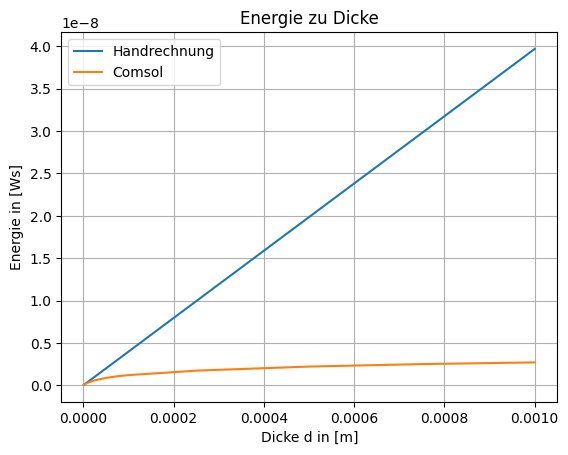

In [20]:
plt.plot(dsweep, Wdh, label= "Handrechnung")
plt.plot(Wd["d (m)"], Wd["Total electric energy (J)"], label= "Comsol")
plt.grid()
plt.ylabel("Energie in [Ws]")
plt.xlabel("Dicke d in [m]")
plt.title("Energie zu Dicke")
plt.legend()

**Qualitative Überlegungen:**

Die Formel für die Energie ist:
$$ W = \frac{1}{2} \frac{Q^2}{C(d)} $$
Die Energie sollte also proportional zu Abstand steigen.

In [21]:
Phidh = Q*dsweep/(eps0*A30)

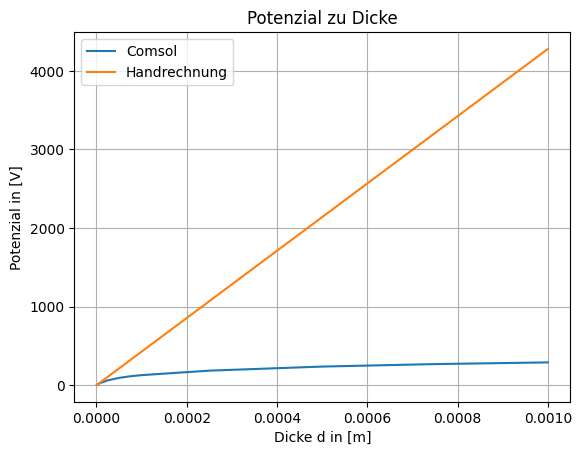

In [22]:
plt.plot(Phid["d (m)"], Phid["Electric potential (V), Potential bewegliche Platte"], label= "Comsol")
plt.plot(dsweep,Phidh,label="Handrechnung")
plt.grid()
plt.ylabel("Potenzial in [V]")
plt.xlabel("Dicke d in [m]")
plt.title("Potenzial zu Dicke")
plt.legend()

**Qualitative Überlegungen:**

Die Formel für das Potenzial ist:
$$ \phi(d) = \frac{Q}{C(d)} $$
Die Formel für die Kapazität ist:
$$ C(d) = \epsilon_0 \cdot \frac{A}{d} $$
Das Potenzial Steigt also bei konstanter Fläche proportional zum Abstand.

In [23]:
Fd = 1/(2)*Q**2/(A30*eps0)
Mfd = Fd*a 

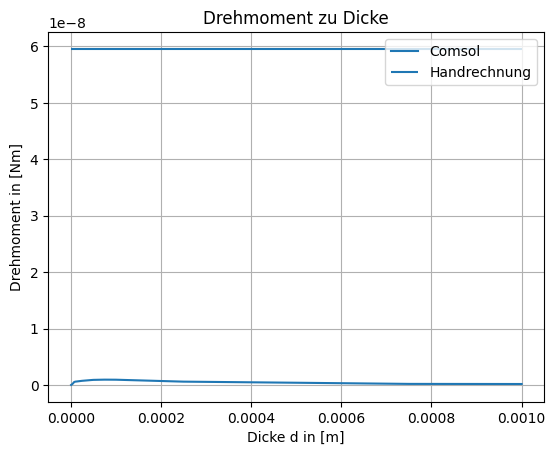

In [24]:
plt.plot(Md["d (m)"], Md["Axial torque (N*m)"], label= "Comsol")
plt.hlines(xmin=0, xmax=dsweep[-1] , y=Mfd, label= "Handrechnung")
plt.grid()
plt.ylabel("Drehmoment in [Nm]")
plt.xlabel("Dicke d in [m]")
plt.title("Drehmoment zu Dicke")
plt.legend()

Der Zusammenhang ist ganz Offensichtlich nicht linear.

Doch woher kommt diese Differenz?
- Es ist sehr wahrscheinlich, dass es die gleichen Einflussfaktoren wie bei der Handrechnung sind.

**Fazit:**
- Potenzial und Energie nehmen zu
- Das Drehmoment scheint ein Maximum bei einem bestimmten Abstand zu haben.